In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!pip install pandas_datareader pandas
!pip install yfinance

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas_datareader import data as web
import datetime
import yfinance as yf
import matplotlib.pyplot as plt

## Exploratory Data Analysis and Data Preprocessing

In [4]:
exog_var = pd.read_csv('/content/gdrive/MyDrive/combined_data.csv', index_col='DATE', parse_dates=True)
exog_var.drop(exog_var.tail(2).index, inplace = True)
exog_var.tail()

,TB3MS,UMCSENT,DXYNYB,SPX return,DJIA return,PPIACO,UNRATE,M1SL,BAMLC0A4CBBBEY,DGS5,...,DGS10,WM2NS,CSUSHPINSA,CPIAUCSL,T10Y2Y,MPRIME,ICSA,EFFR,CBOE SP500 Call Volume,CBOE SP500 Put Volume
DATE,,,,,,,,,,,,,,,,,,,,,
2023-02-01,0.024229,0.032357,0.027130,-0.026112,-0.041933,-0.005987,0.058824,-0.012365,0.031632,0.082104,...,0.060978,-0.007980,0.002107,0.003700,0.163968,0.032000,0.095238,0.054333,-0.016325,0.032322
2023-03-01,0.008602,-0.074627,-0.022504,0.035052,0.018907,-0.006213,-0.027778,-0.019406,0.024464,-0.030092,...,-0.022365,-0.003727,0.013109,0.000530,-0.187175,0.010336,0.107551,0.019228,0.068763,0.071659
2023-04-01,0.049041,0.024194,-0.008194,0.014642,0.024764,-0.000599,-0.028571,-0.018148,-0.046412,-0.074926,...,-0.055430,-0.006567,0.013938,0.003678,-0.130659,0.023018,-0.020661,0.038030,-0.074947,-0.082041
2023-05-01,0.044715,-0.067717,0.026065,0.002482,-0.034896,-0.012604,0.088235,-0.001344,0.034575,0.015370,...,0.032843,-0.009278,0.013133,0.001241,0.003924,0.028750,-0.030591,0.044702,0.050325,0.010791
2023-06-01,0.003891,0.087838,-0.013516,0.064727,0.045561,0.000938,-0.027027,-0.003387,0.026221,0.099728,...,0.048818,0.003830,0.009479,0.001804,0.597022,0.002430,0.117519,0.005907,0.304119,0.197909


In [ ]:
#combined_data.drop(columns = ['BAMLC0A4CBBBEY','BAMLC0A4CBBB','CSUSHPINSA','EFFR'], axis=1, inplace=True)

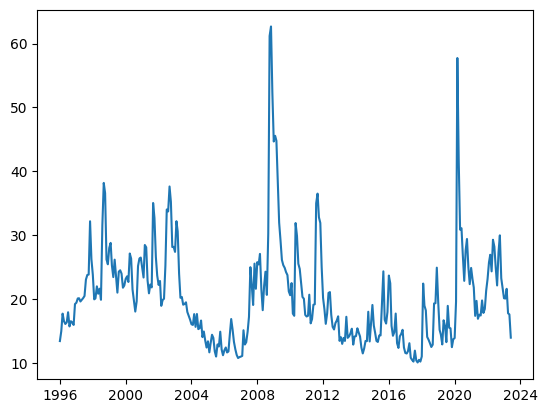

In [27]:
vix = pd.read_csv('/content/gdrive/MyDrive/VIXCLS.csv', index_col='DATE', parse_dates=True)
vix = vix.drop(vix.index[-1])
vix_data = vix['VIXCLS']
vix['VIXCLS'] = vix['VIXCLS'].diff()
vix.drop(vix.tail(2).index, inplace = True)
vix_data.drop(vix_data.tail(2).index, inplace = True)
vix.tail()
plt.plot(vix)

In [6]:
!pip install statsmodels
!pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.7/981.7 kB 7.2 MB/s eta 0:00:00


In [7]:
combined_data = exog_var.copy()
combined_data['VIX'] = vix
combined_data = combined_data.drop(combined_data.index[-1])
combined_data.drop(combined_data.tail(2).index, inplace = True)
combined_data.tail()

,TB3MS,UMCSENT,DXYNYB,SPX return,DJIA return,PPIACO,UNRATE,M1SL,BAMLC0A4CBBBEY,DGS5,...,WM2NS,CSUSHPINSA,CPIAUCSL,T10Y2Y,MPRIME,ICSA,EFFR,CBOE SP500 Call Volume,CBOE SP500 Put Volume,VIX
DATE,,,,,,,,,,,,,,,,,,,,,
2022-11-01,0.115591,-0.051753,-0.050031,0.053753,0.056726,-0.007183,-0.027027,-0.006687,-0.038037,-0.029320,...,0.000172,-0.006042,0.002050,0.564496,0.112000,0.055114,0.219156,-0.146928,-0.076491,-6.706623
2022-12-01,0.024096,0.051056,-0.022935,-0.058971,-0.041704,-0.019988,-0.027778,-0.007223,-0.067503,-0.071807,...,0.001967,-0.008436,0.001313,0.097765,0.046043,-0.008941,0.089722,0.000041,-0.015547,-1.514805
2023-01-01,0.068235,0.087102,-0.013717,0.061753,0.028322,0.009035,-0.028571,-0.013375,-0.033908,-0.032220,...,-0.006150,-0.005329,0.005171,0.005382,0.031637,-0.052707,0.058187,0.049965,0.028601,-1.615238
2023-02-01,0.024229,0.032357,0.027130,-0.026112,-0.041933,-0.005987,0.058824,-0.012365,0.031632,0.082104,...,-0.007980,0.002107,0.003700,0.163968,0.032000,0.095238,0.054333,-0.016325,0.032322,-0.048548
2023-03-01,0.008602,-0.074627,-0.022504,0.035052,0.018907,-0.006213,-0.027778,-0.019406,0.024464,-0.030092,...,-0.003727,0.013109,0.000530,-0.187175,0.010336,0.107551,0.019228,0.068763,0.071659,1.523848


<Axes: >

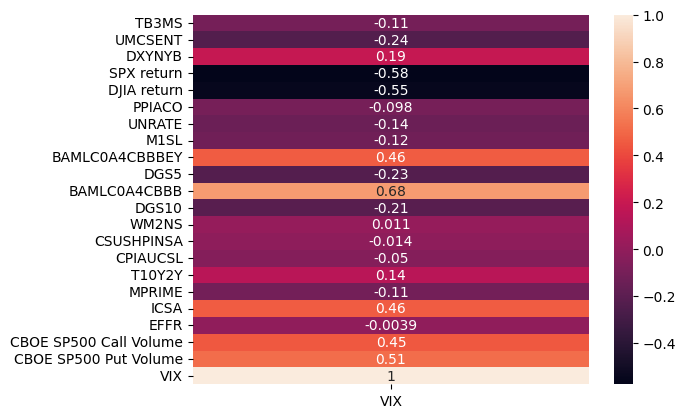

In [8]:
corr_matrix = combined_data.corr()
sns.heatmap(corr_matrix[['VIX']], annot=True)

<Axes: >

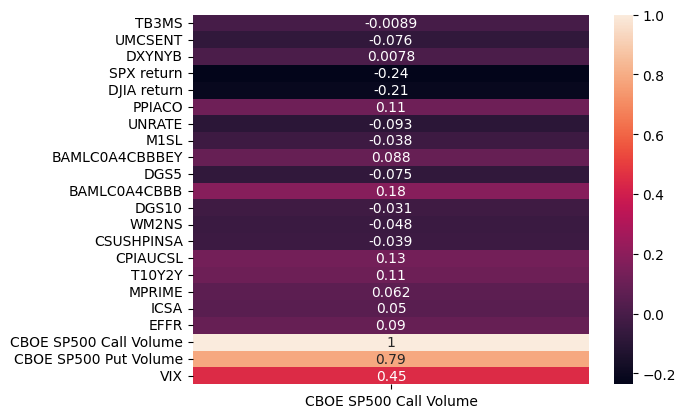

In [9]:
sns.heatmap(corr_matrix[['CBOE SP500 Call Volume']], annot=True)

In [33]:
print(exog_var.shape)
print(vix.shape)
print(vix_data.shape)

(330, 21)
(330, 1)
(330,)


In [11]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

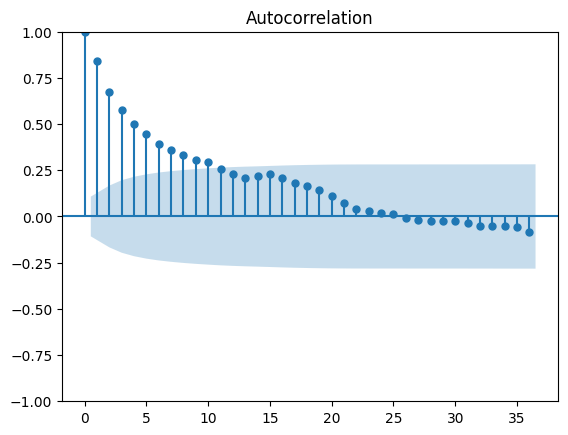

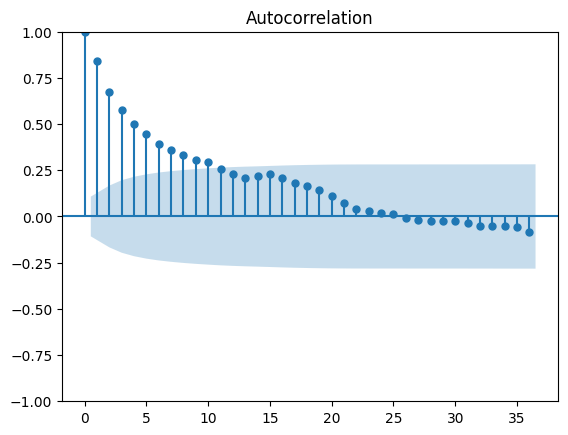

In [13]:
plot_acf(vix_data, lags = 36)

In [14]:
# Perform Dickey-Fuller test
result = adfuller(vix_data)

# Extract and print the results
print('Dickey-Fuller Test Results:')
print(f'Test Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Number of Lags Used: {result[2]}')
print(f'Number of Observations Used: {result[3]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'{key}: {value}')

# Checking to see if differencing is needed
if result[1] <= 0.05:
    print('Result: Reject the null hypothesis. Data is stationary and no differencing is needed')
else:
    print('Result: Fail to reject the null hypothesis. Data is non-stationary and differencing is needed')

Dickey-Fuller Test Results:
Test Statistic: -4.670414879930406
p-value: 9.560742156141317e-05
Number of Lags Used: 2
Number of Observations Used: 329
Critical Values:
1%: -3.4503836022181056
5%: -2.8703653471616826
10%: -2.571471939191249
Result: Reject the null hypothesis. Data is stationary and no differencing is needed


## GARCH

In [16]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 15.2 MB/s eta 0:00:00


In [19]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

In [20]:
def mda(actual, predicted):
    """
    Calculates the Mean Directional Accuracy (MDA) for two time series.

    Parameters:
    actual (array-like): The actual values for the time series.
    predicted (array-like): The predicted values for the time series.

    Returns:
    float: The MDA value.
    """
    actual = np.array(actual)
    predicted = np.array(predicted)

    # calculate the signs of the differences between consecutive values
    actual_diff = np.diff(actual)
    actual_signs = np.sign(actual_diff)
    predicted_diff = np.diff(predicted)
    predicted_signs = np.sign(predicted_diff)

    # count the number of times the signs are the same
    num_correct = np.sum(actual_signs == predicted_signs)

    # calculate the MDA value
    mda = num_correct / (len(actual) - 1)

    return mda


In [85]:
from arch import arch_model
def garch_predict(X, y, z):
    x_train, x_test = train_test_split(X, train_size=0.8)
    y_train, y_test = train_test_split(y, train_size=0.8)
    z_train, z_test = train_test_split(z [1:], train_size=0.8)
    #model
    arima_model = pm.arima.auto_arima (y=y_train, X=x_train, start_p=1, start_q=1,max_p=9, max_d=9, max_q=9, seasonal=False)
    print(arima_model.summary())
    garch_model = arch_model(arima_model.resid(), vol='Garch', p=2, q=1, x=x_train)
    result = garch_model.fit()
    print(result.summary())
    predicted_mu, confit = arima_model.predict(n_periods=y_test.shape[0], return_conf_int=True, X=x_test)
    # Use GARCH to predict the residuals
    garch_forecast = result.forecast(start = y_test.shape[0])
    x_1 = np.sqrt(garch_forecast.variance)
    print(x_1.mean)
    predicted_et = garch_forecast.mean['h.1'].iloc[-1]
    print(predicted_et)
    prediction = predicted_mu + predicted_et
    test_inv = np.add(z.iloc[len (z_train) +1:, 0], prediction)
    mse = mean_squared_error(z_test, test_inv)
    print("Test RMSE: ", mse**0.5)
    mpe = mean_absolute_percentage_error(z_test, test_inv)
    print("Test MAPE: ", mpe)
    r2 = r2_score (z_test, test_inv)
    print("Test r2-score: ", r2)
    da = mda (z_test.values.ravel(), test_inv)
    print("Direction accuracy: ", da)
    prediction_series = pd.Series (test_inv, index=y_test.index)
    fig, ax = plt.subplots(1, 1, figsize=(15, 5))
    ax.plot(z[len (z_train)+1:], label="VIX")
    ax.plot(prediction_series, label="Test Prediction")
    plt.legend()
    plt.show()

In [36]:
selected_features = exog_var[['BAMLC0A4CBBB', 'SPX return', 'UMCSENT', 'DGS10', 'CBOE SP500 Put Volume']]
selected_features.tail()

,BAMLC0A4CBBB,SPX return,UMCSENT,DGS10,CBOE SP500 Put Volume
DATE,,,,,
2023-02-01,-0.049051,-0.026112,0.032357,0.060978,0.032322
2023-03-01,0.142969,0.035052,-0.074627,-0.022365,0.071659
2023-04-01,-0.021823,0.014642,0.024194,-0.055430,-0.082041
2023-05-01,0.036104,0.002482,-0.067717,0.032843,0.010791
2023-06-01,-0.058306,0.064727,0.087838,0.048818,0.197909


In [44]:
print(selected_features.shape)
print(vix.shape)
print(vix_data.shape)

(330, 5)
(330, 1)
(330,)


In [ ]:
garch_predict(selected_features[13:], vix[13:], vix_data[13:])

## Random Forest

In [55]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from datetime import datetime
from sklearn.model_selection import GridSearchCV

In [56]:
x_train, x_test = train_test_split(selected_features[13:329], train_size=0.8, shuffle=False)
y_train, y_test = train_test_split(vix[13:329], train_size=0.8, shuffle=False)

In [57]:
rf_1 = RandomForestRegressor(n_estimators=200, random_state=0).fit(x_train, y_train.values.ravel())
predictions = rf_1.predict(x_test)

mse = mean_squared_error(y_test, predictions)
print(mse)

27.322674636079036


In [58]:
grid_1 = {
    'n_estimators': [100,200,300,400,500],
    'max_features': ['sqrt','log2'],
    'max_depth' : [3,4,5,6,7],
    'random_state' : [0]
}
## show start time
print(datetime.now())
## Grid Search function
CV_rfr = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid_1, cv= 5)
CV_rfr.fit(x_train, y_train.values.ravel())
## show end time
print(datetime.now())

2023-12-21 05:24:38.971648
2023-12-21 05:28:05.526025


In [59]:
CV_rfr.best_params_

{'max_depth': 6,
 'max_features': 'sqrt',
 'n_estimators': 100,
 'random_state': 0}

In [60]:
CV_rfr.best_score_

-0.6790353252603092

In [61]:
rf_2 = RandomForestRegressor(n_estimators=100, random_state=0, max_depth=7, max_features='sqrt').fit(x_train, y_train.values.ravel())
predictions = rf_2.predict(x_test)

mse = mean_squared_error(y_test, predictions)
print(mse)
print(mse**0.5)
mape = mean_absolute_percentage_error(y_test, predictions)
print(mape)
r2 = r2_score(y_test, predictions)
print(r2)
da = mda(y_test.values.ravel(), predictions)
print(da)

23.987920575067427
4.897746479256295
0.18617522509840528
0.5497865944957488
0.6349206349206349


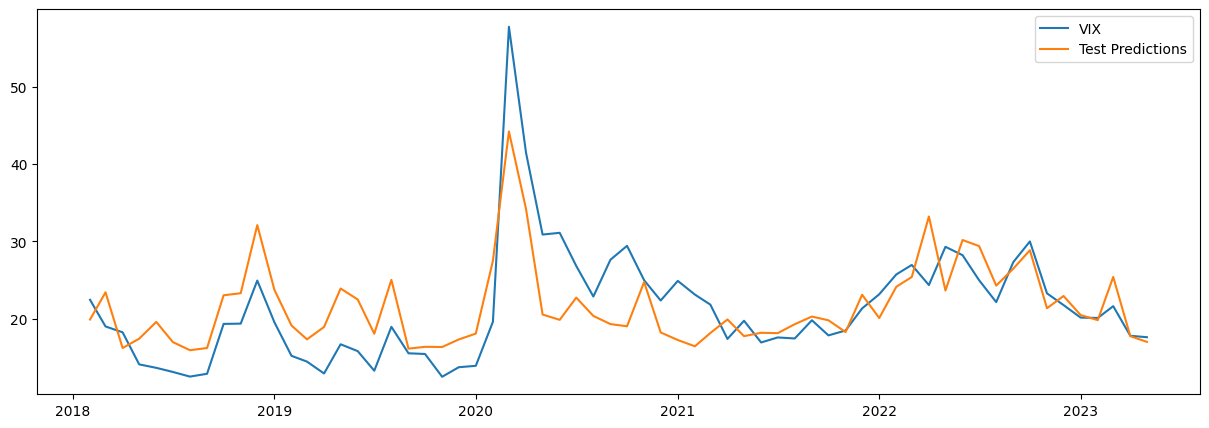

In [62]:
prediction_series = pd.Series(predictions,index=y_test.index)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(vix[265:329], label="VIX")
ax.plot(prediction_series, label="Test Predictions")
plt.legend()
plt.show()

## LSTM

In [64]:
selected_features = exog_var[['BAMLC0A4CBBB', 'TB3MS', 'SPX return', 'UNRATE', 'UMCSENT', 'CBOE SP500 Put Volume']]
selected_features.head()

,BAMLC0A4CBBB,TB3MS,SPX return,UNRATE,UMCSENT,CBOE SP500 Put Volume
DATE,,,,,,
1996-01-01,NaN,NaN,0.032617,NaN,NaN,0.378490
1996-02-01,NaN,-0.034000,0.006934,-0.017857,-0.008959,0.128849
1996-03-01,NaN,0.026915,0.007917,0.000000,0.058757,-0.086021
1996-04-01,NaN,-0.002016,0.013431,0.018182,-0.010672,-0.190592
1996-05-01,NaN,0.014141,0.022853,0.000000,-0.035599,0.000953


In [65]:
vix_diff = vix.copy()
vix_diff['VIXCLS'] = vix['VIXCLS'].diff()
vix.head()

,VIXCLS
DATE,
1996-01-01,13.473636
1996-02-01,15.033000
1996-03-01,17.762381
1996-04-01,16.575238
1996-05-01,16.146364


<Axes: xlabel='DATE'>

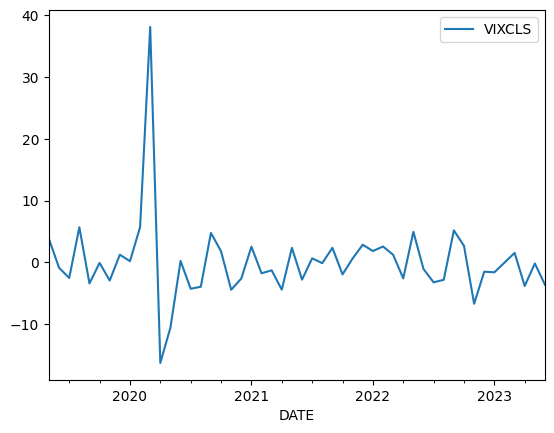

In [66]:
vix_diff[-50:].plot()

In [ ]:
selected_features['VIX (T-1)'] = vix_diff['VIXCLS'].shift(1)
selected_features['VIX (T-2)'] = vix_diff['VIXCLS'].shift(2)
selected_features['VIX (T-3)'] = vix_diff['VIXCLS'].shift(3)
selected_features['VIX (T-12)'] = vix_diff['VIXCLS'].shift(12)

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(selected_features[13:329], train_size=0.8, shuffle=False)
y_train, y_test = train_test_split(vix_diff[13:329], train_size=0.8, shuffle=False)
X_train = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(252, 1, 10) (252, 1) (64, 1, 10) (64, 1)


In [69]:
X_train.shape

(252, 1, 10)

In [71]:
import tensorflow as tf

In [72]:
stacked_lstm = tf.keras.Sequential(
    layers=[
        tf.keras.layers.LSTM(128, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
        tf.keras.layers.LSTM(64, activation='tanh', return_sequences=True),
        tf.keras.layers.LSTM(64, activation='tanh', return_sequences=True),
        tf.keras.layers.LSTM(32, activation='tanh', return_sequences=True),
        tf.keras.layers.LSTM(32, activation='tanh'),
        tf.keras.layers.Dense(1)
            ]
)
stacked_lstm.compile(optimizer='adam', loss='mse')
history = stacked_lstm.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test), verbose=2, shuffle=False, batch_size=5)

51/51 - 1s - loss: 8.1004 - val_loss: 28.7627 - 514ms/epoch - 10ms/step
Epoch 13/60
51/51 - 1s - loss: 7.4442 - val_loss: 28.2609 - 552ms/epoch - 11ms/step
Epoch 14/60
51/51 - 1s - loss: 6.9824 - val_loss: 25.6067 - 544ms/epoch - 11ms/step
Epoch 15/60
51/51 - 1s - loss: 6.6344 - val_loss: 22.0313 - 556ms/epoch - 11ms/step
Epoch 16/60
51/51 - 1s - loss: 6.4019 - val_loss: 22.1456 - 565ms/epoch - 11ms/step
Epoch 17/60
51/51 - 1s - loss: 6.0370 - val_loss: 20.5173 - 532ms/epoch - 10ms/step
Epoch 18/60
51/51 - 1s - loss: 5.5926 - val_loss: 20.4562 - 544ms/epoch - 11ms/step
Epoch 19/60
51/51 - 1s - loss: 5.1729 - val_loss: 19.5966 - 537ms/epoch - 11ms/step
Epoch 20/60
51/51 - 1s - loss: 4.8428 - val_loss: 18.7821 - 535ms/epoch - 10ms/step
Epoch 21/60
51/51 - 1s - loss: 4.6457 - val_loss: 18.9541 - 594ms/epoch - 12ms/step
Epoch 22/60
51/51 - 1s - loss: 4.4918 - val_loss: 19.1115 - 557ms/epoch - 11ms/step
Epoch 23/60
51/51 - 1s - loss: 4.2946 - val_loss: 19.2105 - 539ms/epoch - 11ms/step
Epoc

In [73]:
stacked_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 128)            71168     
                                                                 
 lstm_1 (LSTM)               (None, 1, 64)             49408     
                                                                 
 lstm_2 (LSTM)               (None, 1, 64)             33024     
                                                                 
 lstm_3 (LSTM)               (None, 1, 32)             12416     
                                                                 
 lstm_4 (LSTM)               (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 174369 (681.13 KB)
Trainable params: 17436

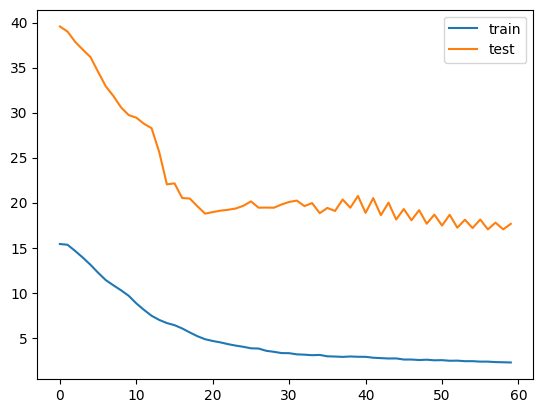

In [74]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [78]:
# Evaluate the model
loss = stacked_lstm.evaluate(X_test, y_test)
print('Test loss:', loss)

# Make predictions
predictions = stacked_lstm.predict(X_test)
a = predictions[:, 0] + vix.iloc[265,0]
print(a)
print('MAPE: ', mean_absolute_percentage_error(vix.iloc[265:329, 0], a))
print('RMSE: ', mean_squared_error(vix.iloc[265:329, 0], a)**0.5)
da = np.sum(np.sign(predictions) == np.sign(y_test))/ (len(y_test) - 1)
print('Directional Accuracy: ', da)
r2 = r2_score(vix.iloc[265:329, 0], a)
print('R2-Score: ', r2)

2/2 [==============================] - 0s 12ms/step - loss: 17.6500
Test loss: 17.650047302246094
2/2 [==============================] - 0s 8ms/step
[24.218044 21.134981 19.583908 18.153198 22.107426 21.277166 23.51016
 22.697191 25.12077  21.811136 30.968262 15.107763 24.207142 20.052076
 20.486849 25.88496  20.699696 17.454653 25.345036 19.80007  28.437458
 19.405756 21.72348  22.443863 30.394386 41.19227  20.141546 13.871251
 14.442329 20.613895 25.714417 23.67217  19.20797  16.272022 19.151955
 23.592283 22.853477 21.985432 20.74422  24.688389 18.411673 23.49331
 21.00577  24.960777 20.665747 23.44722  20.966995 22.553185 23.116472
 23.320717 19.590494 24.953032 20.270166 19.676304 21.066868 24.616978
 16.059748 16.037703 19.668255 21.673111 23.025047 24.02999  21.13778
 22.622026]
MAPE:  0.2929692954529579
RMSE:  7.3470219499775
Directional Accuracy:  VIXCLS    0.793651
dtype: float64
R2-Score:  -0.013091087759133924


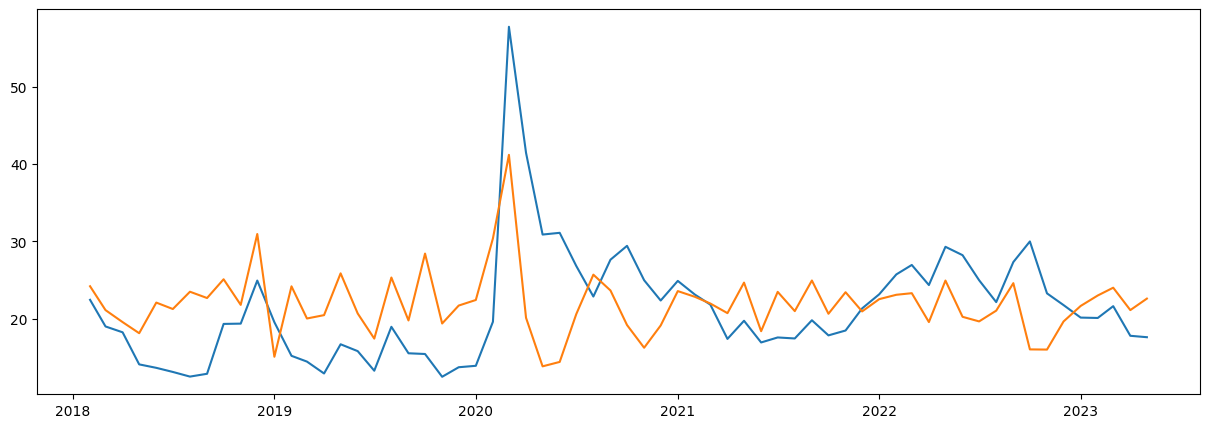

In [79]:
prediction_series = pd.Series(a,index=y_test.index)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(vix[265:329], label="VIX")
ax.plot(prediction_series, label="Test Predictions")
plt.show()

In [ ]:
bidirectional_lstm = tf.keras.Sequential(
    layers=[
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2]))),
        tf.keras.layers.Dense(1)
            ]
)
bidirectional_lstm.compile(optimizer='adam', loss='mse')
history = bidirectional_lstm.fit(X_train, y_train, epochs=130, validation_data=(X_test, y_test), verbose=2, shuffle=False)

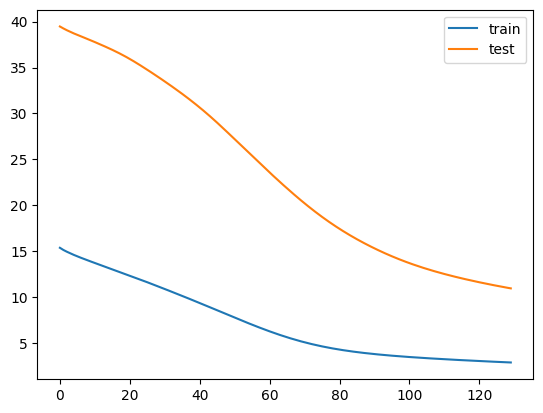

In [80]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [83]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
# Evaluate the model
loss = bidirectional_lstm.evaluate(X_test, y_test)
print('Test loss:', loss)

# Make predictions
predictions = bidirectional_lstm.predict(X_test)
a = predictions[:, 0] + vix.iloc[265,0]
print(a)
print('MAPE: ', mean_absolute_percentage_error(vix.iloc[265:329, 0], a))
print('RMSE: ', mean_squared_error(vix.iloc[265:329, 0], a)**0.5)
da = np.sum(np.sign(predictions) == np.sign(y_test))/ (len(y_test) - 1)
print('Directional Accuracy: ', da)
r2 = r2_score(vix.iloc[265:329, 0], a)
print('R2-Score: ', r2)

2/2 [==============================] - 0s 11ms/step - loss: 10.9620
Test loss: 10.962047576904297
2/2 [==============================] - 0s 11ms/step
[25.305622 20.343481 18.137981 20.037682 21.680687 21.206163 23.676067
 22.112276 26.915604 21.950026 28.11307  17.27546  21.42979  22.80487
 20.683628 24.714462 22.001005 19.368896 26.55094  21.138357 26.079464
 20.392057 22.196735 24.765238 25.936508 46.848633 17.988705 14.228225
 19.693157 22.607147 23.287422 23.781809 20.901184 19.89376  20.088512
 23.624262 21.99251  21.244617 22.79954  25.992361 19.840494 22.281479
 23.542469 24.55316  20.577452 23.003546 21.773827 21.816175 21.619724
 23.791822 19.380589 24.554213 26.31911  20.269497 20.628614 23.800547
 20.86404  18.792667 20.47475  22.335993 22.571095 24.573027 20.290508
 22.786718]
MAPE:  0.2835408487236974
RMSE:  6.773932104494603
Directional Accuracy:  VIXCLS    0.698413
dtype: float64
R2-Score:  0.1387931036381289


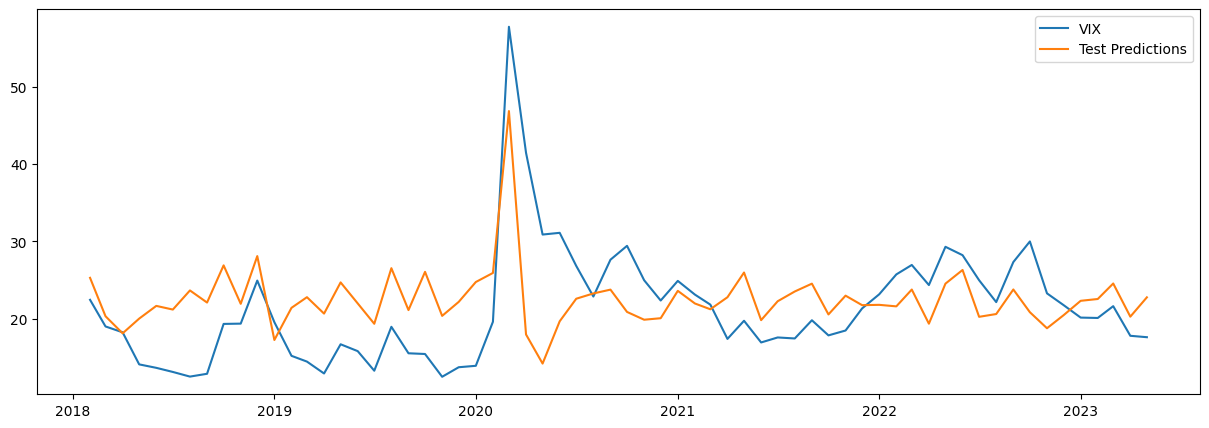

In [82]:
prediction_series = pd.Series(a,index=y_test.index)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(vix[265:329], label="VIX")
ax.plot(prediction_series, label="Test Predictions")
plt.legend()
plt.show()